<a href="https://colab.research.google.com/github/mertcapar/hu-bby261-2020/blob/main/proje_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /gdrive
uint8
(28, 28)


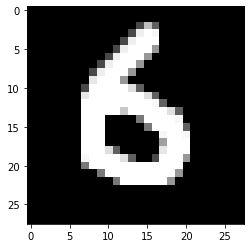

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  72 191  96   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  72 239 255 247   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  72 239 255 255 255   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  72 239 255 255 255 151   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  72 239 255 255 255 151   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  72 239 255 255 255 151   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  72 239 255 255 255 151   0   

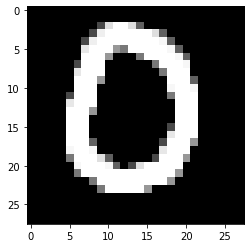

In [1]:
import matplotlib as plt
from google.colab import drive
drive.mount("/gdrive", force_remount=True)
import cv2 
import numpy as nm 
import matplotlib.pyplot as plt
 
img=cv2.imread("/gdrive/My Drive/proje_03/6.png") 
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

from matplotlib import image
from matplotlib import pyplot

# load image as pixel array
# summarize shape of the pixel array
print(gray_img.dtype)
print(gray_img.shape)

# display the array of pixels as an image
pyplot.imshow(gray_img, cmap=plt.cm.binary_r)
pyplot.show()
print(gray_img)

import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

import matplotlib.pyplot as plt

# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

model.evaluate(x_test, y_test)

from PIL import Image
import numpy as np

png = Image.open("/gdrive/My Drive/proje_03/0.png").convert("L")
png = np.resize(png, (28,28,1))
pngBinary = np.array(png)
plt.imshow(pngBinary.reshape(28, 28),cmap='gray')

tahminDizi = model.predict(pngBinary.reshape(1, 28, 28, 1))
tahminSayi = np.argmax(model.predict(pngBinary.reshape(1, 28, 28, 1)), axis=-1)

print(tahminDizi)
print(tahminSayi)